In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
fifa_data = pd.read_excel('fifa_data.xlsx')
fifa_data[:3]

,NAME,RAT,POS,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,NATION,TEAM,VALUE
0,Robert Lewandowski,98,FW,93,97,89,95,51,92,184,2498,33,Poland,Bayern Munich,60.0
1,Cristiano Ronaldo,98,FW,95,99,90,95,43,90,187,2474,36,Portugal,Juventus FC,45.0
2,Lionel Messi,98,FW,91,99,96,99,43,80,170,2477,34,Argentina,Paris Saint-Germain,80.0


In [3]:
fifa_data = pd.read_excel('fifa_data.xlsx')
fifa_data1=fifa_data[fifa_data["VALUE"]>=1]
fifa_data2=fifa_data1.drop(["NAME","NATION","TEAM","POS"],axis=1)
fifa_data2[:3]

,RAT,PAC,SHO,PAS,DRI,DEF,PHY,HEI,IGS,AGE,VALUE
0,98,93,97,89,95,51,92,184,2498,33,60.0
1,98,95,99,90,95,43,90,187,2474,36,45.0
2,98,91,99,96,99,43,80,170,2477,34,80.0


In [4]:
X = fifa_data2.drop(["VALUE"],axis=1)
y = fifa_data2.VALUE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
lr_model = LinearRegression().fit(X_train, y_train)
y_answer = lr_model.predict(X_test)

In [6]:
lr_model.score(X_test, y_test)

0.5839741192118746

In [7]:
lr_model.score(X_train, y_train)

0.6684868538175468

In [8]:
mse = mean_squared_error(y_test, y_answer)
mse

320.6932990864827

In [9]:
rmse = np.sqrt(mse)
rmse

17.907911633869613

In [10]:
r2 = r2_score(y_test, y_answer) 
r2

0.5839741192118746

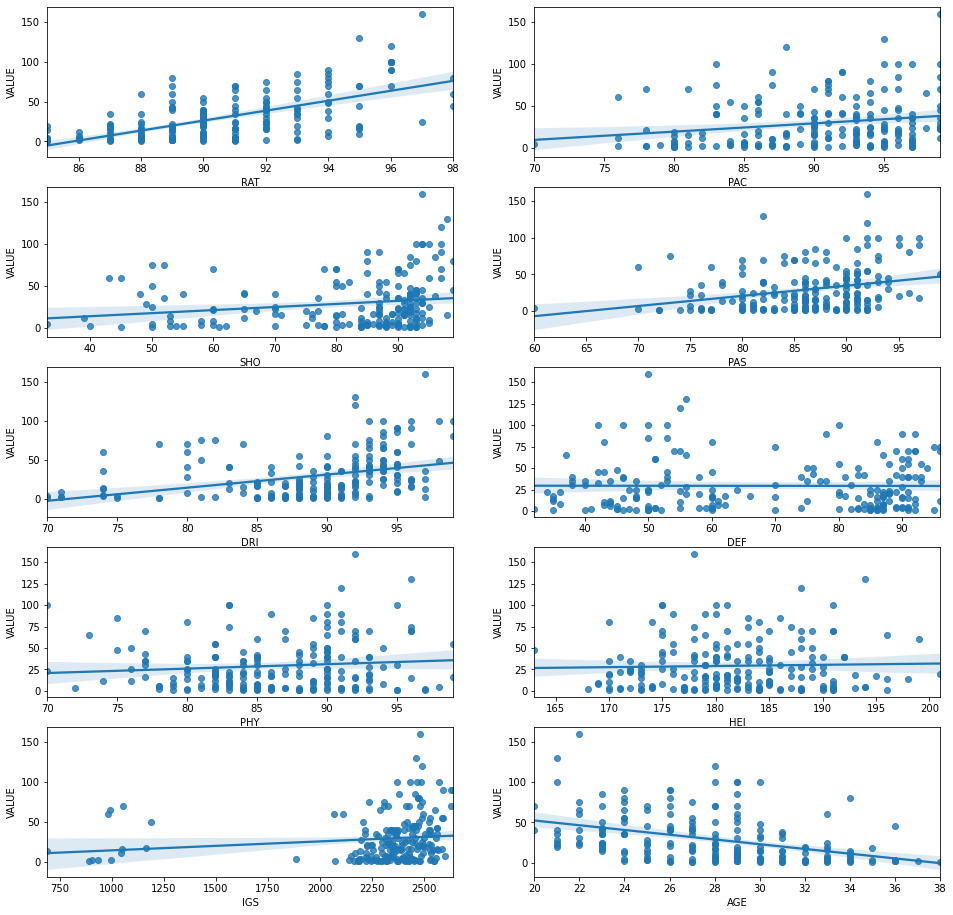

In [12]:
fig, ax = plt.subplots(figsize=(16,16), ncols=2, nrows=5)
for i, feature in enumerate(X):
    row = int(i/2)
    col = i%2
    sns.regplot(x=feature, y= fifa_data2.VALUE, data = fifa_data1 , ax=ax[row][col])